In [104]:
import pandas as pd 

In [105]:
df = pd.read_csv(r"C:\Users\sachi\OneDrive\Product Demand Forecasting\DATA\pricing_data.csv")

In [106]:
df.sample(10)

,ProductID,Location,Date,Price,Discount(%),CompetitorPrice,AdCampaign
45813,P0077,L04,2024-02-03,489.54,10,565.29,NaN
1358,P0003,L03,2024-02-08,197.85,0,209.00,TV
85205,P0143,L01,2024-01-06,132.32,20,213.74,TV
129654,P0217,L01,2024-02-24,292.78,15,287.36,Online
11402,P0020,L01,2024-01-03,192.17,10,210.33,NaN
74880,P0125,L09,2024-01-01,135.23,20,190.33,NaN
126263,P0211,L05,2024-01-24,683.77,0,672.30,TV
54130,P0091,L03,2024-01-11,781.59,5,789.25,NaN
293043,P0489,L05,2024-01-04,386.14,15,502.15,Online
103311,P0173,L02,2024-02-21,249.44,5,274.04,TV


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ProductID        300000 non-null  object 
 1   Location         300000 non-null  object 
 2   Date             300000 non-null  object 
 3   Price            300000 non-null  float64
 4   Discount(%)      300000 non-null  int64  
 5   CompetitorPrice  300000 non-null  float64
 6   AdCampaign       193356 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 16.0+ MB


In [108]:
df.isnull().sum()

ProductID               0
Location                0
Date                    0
Price                   0
Discount(%)             0
CompetitorPrice         0
AdCampaign         106644
dtype: int64

In [109]:
df.shape

(300000, 7)

# filling missing values in AdCampaign

In [110]:

# Step 1: Replace blank strings with NaN
df['AdCampaign'] = df['AdCampaign'].replace('', pd.NA)

# Step 2: Get the most frequent AdCampaign per (ProductID, Location)
mode_dict = (
    df[df['AdCampaign'].notna()]
    .groupby(['ProductID', 'Location'])['AdCampaign']
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else pd.NA)
)

# Step 3: Create key tuple for lookup
df['_key'] = list(zip(df['ProductID'], df['Location']))

# Step 4: Fill missing AdCampaigns using the mode_dict
df['AdCampaign'] = df.apply(
    lambda row: mode_dict.get(row['_key']) if pd.isna(row['AdCampaign']) else row['AdCampaign'],
    axis=1
)

# Step 5: Drop temporary key column
df.drop(columns=['_key'], inplace=True)


In [111]:
df.isnull().sum()

ProductID          0
Location           0
Date               0
Price              0
Discount(%)        0
CompetitorPrice    0
AdCampaign         0
dtype: int64

In [112]:
df.sample(10)

,ProductID,Location,Date,Price,Discount(%),CompetitorPrice,AdCampaign
156720,P0262,L03,2024-01-01,145.11,15,141.98,TV
35277,P0059,L08,2024-02-27,356.78,10,413.65,Online
244423,P0408,L04,2024-02-13,385.44,0,379.27,TV
289823,P0484,L01,2024-01-24,550.55,20,723.39,TV
150264,P0251,L05,2024-01-25,832.90,10,947.02,Online
81327,P0136,L06,2024-01-28,711.24,20,899.60,TV
16741,P0028,L10,2024-01-02,863.83,5,897.07,Online
187902,P0314,L02,2024-02-12,579.04,0,589.60,Online
95966,P0160,L10,2024-01-27,639.18,5,638.32,Online
246406,P0411,L07,2024-02-16,615.22,0,646.72,TV


In [113]:
df.dtypes

ProductID           object
Location            object
Date                object
Price              float64
Discount(%)          int64
CompetitorPrice    float64
AdCampaign          object
dtype: object

# converting data types

In [114]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Optional: convert 'ProductID' and 'Location' to string explicitly
df['ProductID'] = df['ProductID'].astype(str)
df['Location'] = df['Location'].astype(str)

# Optional: convert 'AdCampaign' to category for memory optimization
df['AdCampaign'] = df['AdCampaign'].astype('category')


In [115]:
df.dtypes

ProductID                  object
Location                   object
Date               datetime64[ns]
Price                     float64
Discount(%)                 int64
CompetitorPrice           float64
AdCampaign               category
dtype: object

# Removing whitespace from the data or column

In [116]:
str_cols = df.select_dtypes(include='object').columns
df[str_cols] = df[str_cols].apply(lambda x: x.str.strip())


# changing column name

In [117]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('%', 'percent')


In [118]:
df.head()

,productid,location,date,price,discount(percent),competitorprice,adcampaign
0,P0001,L01,2024-01-01,362.83,15,401.74,TV
1,P0001,L01,2024-01-02,426.86,0,417.01,Online
2,P0001,L01,2024-01-03,384.17,10,415.22,Online
3,P0001,L01,2024-01-04,362.83,15,413.71,Online
4,P0001,L01,2024-01-05,341.49,20,414.10,TV


In [119]:
print(df.isna().sum())


productid            0
location             0
date                 0
price                0
discount(percent)    0
competitorprice      0
adcampaign           0
dtype: int64


In [120]:
df.duplicated().sum()

np.int64(0)

# Checking for outliers

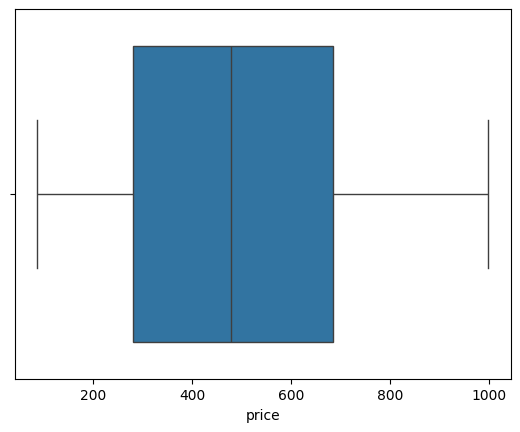

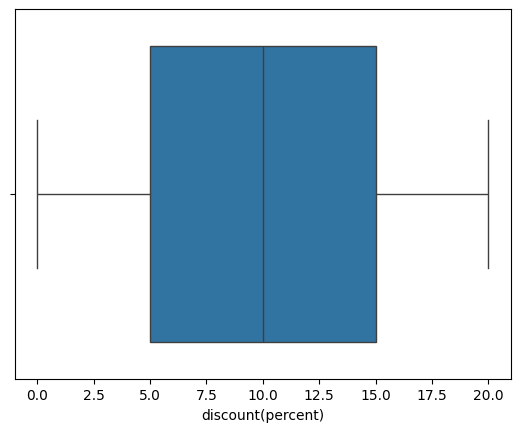

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['price']); plt.show()
sns.boxplot(x=df['discount(percent)']); plt.show()


In [122]:
df[['price','competitorprice']].describe()


,price,competitorprice
count,300000.000000,300000.000000
mean,489.542807,544.023292
std,234.901780,258.342569
min,87.190000,-0.320000
25%,280.960000,316.740000
50%,478.080000,535.450000
75%,683.850000,765.370000
max,997.670000,1095.330000


In [123]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound_price = Q1 - 1.5 * IQR
upper_bound_price = Q3 + 1.5 * IQR

outliers_price = df[(df['price'] < lower_bound_price) | (df['price'] > upper_bound_price)]


In [124]:
print("Total outliers in Price:", outliers_price.shape[0])


Total outliers in Price: 0


<Axes: xlabel='price'>

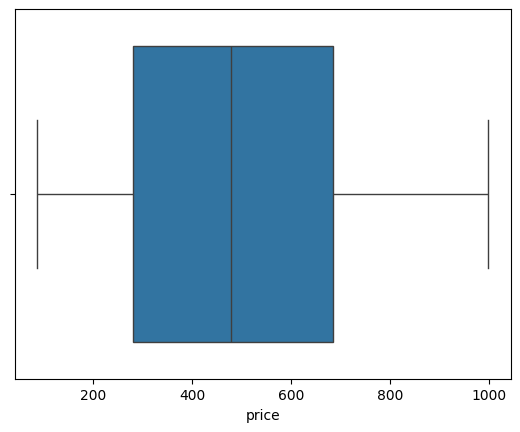

In [125]:
import seaborn as sns
sns.boxplot(x=df['price'])

In [126]:
Q1 = df['competitorprice'].quantile(0.25)
Q3 = df['competitorprice'].quantile(0.75)
IQR = Q3 - Q1

lower_bound_comp = Q1 - 1.5 * IQR
upper_bound_comp = Q3 + 1.5 * IQR

outliers_comp = df[(df['competitorprice'] < lower_bound_comp) | (df['competitorprice'] > upper_bound_comp)]


In [127]:
print("Total outliers in Price:", outliers_comp.shape[0])


Total outliers in Price: 0


# Standardize AdCampaign values (optional)

In [128]:
df['adcampaign'] = df['adcampaign'].str.lower().str.title()
# For example: "tv", "TV" → "Tv"


In [129]:
df.head()

,productid,location,date,price,discount(percent),competitorprice,adcampaign
0,P0001,L01,2024-01-01,362.83,15,401.74,Tv
1,P0001,L01,2024-01-02,426.86,0,417.01,Online
2,P0001,L01,2024-01-03,384.17,10,415.22,Online
3,P0001,L01,2024-01-04,362.83,15,413.71,Online
4,P0001,L01,2024-01-05,341.49,20,414.10,Tv


In [130]:
df.rename(columns={'discount(percent)': 'discount_percent'}, inplace=True)


In [131]:
(df['price'] < 0).sum()

np.int64(0)

In [132]:
(df['discount_percent'] < 0).sum()

np.int64(0)

In [133]:
(df['competitorprice'] < 0).sum()


np.int64(1)

In [134]:
df[df['competitorprice'] < 0][['productid', 'location', 'price', 'competitorprice']]


,productid,location,price,competitorprice
151374,P0253,L03,127.42,-0.32


In [135]:
df['competitorprice'].describe()


count    300000.000000
mean        544.023292
std         258.342569
min          -0.320000
25%         316.740000
50%         535.450000
75%         765.370000
max        1095.330000
Name: competitorprice, dtype: float64

In [136]:
df['competitorprice'].unique()


array([401.74, 417.01, 415.22, ..., 314.55, 346.62, 379.78],
      shape=(90604,))

In [137]:
filtered_rows = df[(df['competitorprice'] < 20)]


In [138]:
filtered_rows

,productid,location,date,price,discount_percent,competitorprice,adcampaign
151374,P0253,L03,2024-02-24,127.42,10,-0.32,Tv
200823,P0335,L08,2024-01-04,87.35,20,18.98,Online
200841,P0335,L08,2024-01-22,92.81,15,13.63,Online
274517,P0458,L06,2024-01-18,105.05,5,0.72,Tv


In [139]:
filtered_rows1 = df[(df['productid'] == 'P0253') & (df['location'] == 'L03')]



In [140]:
filtered_rows1

,productid,location,date,price,discount_percent,competitorprice,adcampaign
151320,P0253,L03,2024-01-01,134.49,5,142.31,Online
151321,P0253,L03,2024-01-02,141.57,0,159.72,Online
151322,P0253,L03,2024-01-03,141.57,0,133.29,Online
151323,P0253,L03,2024-01-04,113.26,20,171.70,Online
151324,P0253,L03,2024-01-05,134.49,5,105.43,Online
151325,P0253,L03,2024-01-06,113.26,20,218.51,Online
151326,P0253,L03,2024-01-07,127.42,10,154.70,Tv
151327,P0253,L03,2024-01-08,113.26,20,178.50,Tv
151328,P0253,L03,2024-01-09,141.57,0,158.13,Online
151329,P0253,L03,2024-01-10,141.57,0,157.35,Online


# filling values in CompetitorPrice which doesnt make any sense

In [141]:
# Step 1: Filter those rows
mask = (df['productid'] == 'P0253') & (df['location'] == 'L03')

# Step 2: Calculate mean of CompetitorPrice for that group
mean_value = df.loc[mask, 'competitorprice'].mean()

# Step 3: Replace values less than 60 with mean
df.loc[mask & (df['competitorprice'] < 60), 'competitorprice'] = mean_value


In [150]:
filtered_rows3 = df[(df['productid'] == 'P0458') & (df['location'] == 'L06')]

In [143]:
filtered_rows3['competitorprice'].mean()

np.float64(111.2215)

In [151]:
filtered_rows3

,productid,location,date,price,discount_percent,competitorprice,adcampaign
274500,P0458,L06,2024-01-01,105.05,5,85.6900,Online
274501,P0458,L06,2024-01-02,105.05,5,120.2600,Tv
274502,P0458,L06,2024-01-03,99.52,10,69.2500,Tv
274503,P0458,L06,2024-01-04,110.58,0,169.6600,Online
274504,P0458,L06,2024-01-05,105.05,5,129.4400,Online
274505,P0458,L06,2024-01-06,99.52,10,137.6500,Tv
274506,P0458,L06,2024-01-07,105.05,5,132.7900,Tv
274507,P0458,L06,2024-01-08,105.05,5,130.3700,Tv
274508,P0458,L06,2024-01-09,105.05,5,103.2600,Tv
274509,P0458,L06,2024-01-10,88.46,20,132.7700,Online


In [147]:
# Step 1: Filter those rows
mask = (df['productid'] == 'P0458') & (df['location'] == 'L06')

# Step 2: Calculate mean of CompetitorPrice for that group
mean_value = df.loc[mask, 'competitorprice'].mean()

# Step 3: Replace values less than 60 with mean
df.loc[mask & (df['competitorprice'] < 30), 'competitorprice'] = mean_value


In [152]:
df['competitorprice'] = df['competitorprice'].apply(lambda x: round(x, 2) if pd.notnull(x) else x)


In [153]:
df.sample(10)

,productid,location,date,price,discount_percent,competitorprice,adcampaign
171876,P0287,L05,2024-02-06,163.12,15,176.36,Tv
201283,P0336,L05,2024-02-13,157.21,10,200.96,Tv
220878,P0369,L02,2024-01-19,313.28,15,404.04,Tv
95502,P0160,L02,2024-02-12,538.25,20,727.55,Online
217098,P0362,L09,2024-01-19,133.21,15,133.39,Online
249821,P0417,L04,2024-02-11,246.35,0,229.81,Tv
158764,P0265,L07,2024-01-05,513.07,5,553.63,Tv
5971,P0010,L10,2024-02-01,741.89,5,747.13,Tv
215637,P0360,L04,2024-02-27,895.85,0,928.63,Tv
270601,P0452,L01,2024-01-02,791.95,15,939.63,Tv


In [154]:
df[(df['productid']=='P0458') & (df['location']=="L06")]

,productid,location,date,price,discount_percent,competitorprice,adcampaign
274500,P0458,L06,2024-01-01,105.05,5,85.69,Online
274501,P0458,L06,2024-01-02,105.05,5,120.26,Tv
274502,P0458,L06,2024-01-03,99.52,10,69.25,Tv
274503,P0458,L06,2024-01-04,110.58,0,169.66,Online
274504,P0458,L06,2024-01-05,105.05,5,129.44,Online
274505,P0458,L06,2024-01-06,99.52,10,137.65,Tv
274506,P0458,L06,2024-01-07,105.05,5,132.79,Tv
274507,P0458,L06,2024-01-08,105.05,5,130.37,Tv
274508,P0458,L06,2024-01-09,105.05,5,103.26,Tv
274509,P0458,L06,2024-01-10,88.46,20,132.77,Online


In [155]:
# Find invalid discounts
invalid_discounts = df[(df['discount_percent'] < 0) | (df['discount_percent'] > 100)]
print(f"Invalid Discount Rows: {len(invalid_discounts)}")

# Optional: View them
# print(invalid_discounts)


Invalid Discount Rows: 0


In [156]:
df['finalprice'] = df['price'] * (1 - df['discount_percent'] / 100)
df['finalprice'] = df['finalprice'].round(2)


In [157]:
df.head()

,productid,location,date,price,discount_percent,competitorprice,adcampaign,finalprice
0,P0001,L01,2024-01-01,362.83,15,401.74,Tv,308.41
1,P0001,L01,2024-01-02,426.86,0,417.01,Online,426.86
2,P0001,L01,2024-01-03,384.17,10,415.22,Online,345.75
3,P0001,L01,2024-01-04,362.83,15,413.71,Online,308.41
4,P0001,L01,2024-01-05,341.49,20,414.10,Tv,273.19


In [158]:
df.dtypes

productid                   object
location                    object
date                datetime64[ns]
price                      float64
discount_percent             int64
competitorprice            float64
adcampaign                  object
finalprice                 float64
dtype: object

In [159]:
df.to_csv(r"C:\Users\sachi\OneDrive\Product Demand Forecasting\CLEANED DATA\pricing_data_Cleaned.csv.csv",index=False)